# Project 2: Continuous Control

---

In this notebook, we will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

In [10]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment

## Create the Unity environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/) are installed.

**_Before running the code cell below_**, change the `ENVIRONMENT_PATH` parameter to match the location of the Unity environment that you downloaded.

In [2]:
# ENVIRONMENT_PATH = "../environments/Reacher.app"
ENVIRONMENT_PATH = "../environments/Reacher_Linux/Reacher.x86_64"

In [3]:
SRC_PATH = "../src"
MODEL_CHECKPOINT_PATH = "../models/drlnd_p2_model.pth"

In [4]:
sys.path.append(SRC_PATH)

In [5]:
from agents.policy_based import DDPG
from environments import UnityEnvWrapper

In [6]:
env = UnityEnvWrapper(UnityEnvironment(file_name=ENVIRONMENT_PATH))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of our agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

## Take Random Actions in the Environment

In the next code cell, we will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, we will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows us to observe the agent, as it moves through the environment.  

Of course, as part of the project, we'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

## Training an agent

In [7]:
agent = DDPG(state_size=env.state_size, action_size=env.action_size, seed=0)

In [8]:
scores = agent.learn(environment=env, average_target_score=30, model_checkpoint_path=MODEL_CHECKPOINT_PATH)

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.00
Episode 600	Average Score: 0.00
Episode 700	Average Score: 0.00
Episode 800	Average Score: 0.00
Episode 900	Average Score: 0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.00
Episode 1200	Average Score: 0.00
Episode 1300	Average Score: 0.00
Episode 1400	Average Score: 0.00
Episode 1500	Average Score: 0.00
Episode 1600	Average Score: 0.00
Episode 1700	Average Score: 0.00
Episode 1800	Average Score: 0.00
Episode 1900	Average Score: 0.00
Episode 2000	Average Score: 0.00
Episode 2100	Average Score: 0.00
Episode 2200	Average Score: 0.00
Episode 2300	Average Score: 0.00
Episode 2400	Average Score: 0.00
Episode 2500	Average Score: 0.00
Episode 2600	Average Score: 0.00
Episode 2700	Average Score: 0.00
Episode 2800	Average Score: 0.00
Episode 2900	Average Score: 0.00
Episode 3000	Average Score: 0.00
Episode 3100	Averag

NameError: name 'pd' is not defined

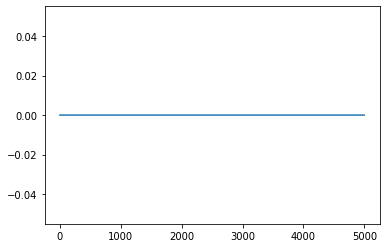

In [9]:
x = np.arange(len(scores))
plt.plot(x, scores)
plt.plot(x, pd.Series(scores).rolling(50).mean())
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.savefig("scores")
plt.show();

## Load model and test a pre-trained agent

In [11]:
agent = DDPG.load(MODEL_CHECKPOINT_PATH)
state = env.reset(train_mode=False)

FileNotFoundError: [Errno 2] No such file or directory: '../models/drlnd_p2_model.pth'

In [ ]:
score = 0
while True:
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    score += reward
    state = next_state
    if done:
        break
    
print(f"Score: {score}")

In [ ]:
env.close()